# Project: Investigate a Dataset - [FBI Gun]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov

### Question(s) for Analysis

1. What census data is most associated with high gun per capita?
2. Which states have had the highest growth in gun registrations?
3. What is the overall trend of gun purchases?

In [1]:
# Importing of the packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading data
census = pd.read_csv('Database_Ncis_and_Census_data/US_Census_Data.csv')
gun = pd.read_excel('Database_Ncis_and_Census_data/gun_data.xlsx', engine='xlrd')

In [3]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [4]:
census.duplicated().sum()

3

In [5]:
# Counting null values
census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [6]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [7]:
census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Total employment, percent change, 2014-2015",(c),"92,219",7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,0.143,0.048,50.40%,2.50%,1.90%,88.30%,"$1,731",1.50%,"19,274",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [8]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [9]:
gun.duplicated().sum()

0

In [10]:
gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [11]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [12]:
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### Data Cleaning

In [13]:
# make a copy of census data
census_copy = census.copy()

In [14]:
# remove NaNs in census from row 65
census_copy.drop(census_copy.index[65:], inplace = True)

In [15]:
# remove 'Fact Note' columns - not needed
census_copy.drop(['Fact Note'], axis=1, inplace=True)

In [16]:
# set 'Fact' column as an index
census_copy.set_index('Fact', inplace=True)

In [17]:
# Transpose census data
census_copy = census_copy.T.reset_index()

In [18]:
census_copy.rename(columns={'index': 'State'}, inplace=True)

In [19]:
census_copy.dropna(inplace=True)

In [20]:
census_copy

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [21]:
columns = census_copy.columns[1:len(census_copy.columns)-1]

In [22]:
def percentage(val):
    result = val
    if val > 0.001:
        result = val /100
    return result    

In [23]:
# fix values
for column in columns:
    census_copy[column].replace(regex=True, inplace=True, to_replace = r'[^\d.-]', value = r'')
    census_copy[column] = pd.to_numeric(census_copy[column], downcast='float')
    census_copy[column] = census_copy[column].apply(percentage)

In [24]:
census_copy

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,48633.00,47801.31,0.01700,47797.36,0.06000,0.06400,0.22600,0.23700,0.16100,...,3741.53,2036.04,1376.30,922.19,2726.51,419.43,3169.84,0.944,506.453281,"""01"""
1,Alaska,7418.94,7102.49,0.04500,7102.31,0.07300,0.07600,0.25200,0.26400,0.10400,...,680.32,354.02,221.41,136.88,511.47,79.53,560.91,0.012,5706.409375,"""02"""
2,Arizona,69310.71,63923.01,0.08400,63920.17,0.06300,0.07100,0.23500,0.25500,0.16900,...,4999.26,2452.43,1824.25,1353.13,3449.81,467.80,4275.82,0.563,1135.940781,"""04"""
3,Arkansas,29882.48,29160.25,0.02500,29159.18,0.06400,0.06800,0.23600,0.24400,0.16300,...,2319.59,1231.58,759.62,359.82,1890.29,259.15,1929.88,0.560,520.354805,"""05"""
4,California,392500.16,372545.20,0.05400,372539.56,0.06300,0.06800,0.23200,0.25000,0.13600,...,35484.49,18525.80,13200.85,16198.57,18191.07,2523.77,31763.41,2.391,1557.792187,"""06"""
5,Colorado,55405.45,50293.24,0.10200,50291.96,0.06100,0.06800,0.22800,0.24400,0.13400,...,5473.52,2845.54,1945.08,858.49,4423.65,517.22,4695.24,0.485,1036.418906,"""08"""
6,Connecticut,35764.52,35741.14,0.00100,35740.97,0.05200,0.05700,0.21100,0.22900,0.16100,...,3266.93,1878.45,1066.78,561.13,2596.14,310.56,2811.82,7.381,48.423599,"""09"""
7,Delaware,9520.65,8979.36,0.06000,8979.34,0.05800,0.06200,0.21500,0.22900,0.17500,...,734.18,383.28,239.64,144.40,547.82,72.06,603.18,4.608,19.485400,"""10"""
8,Florida,206124.40,188045.92,0.09600,188013.10,0.05500,0.05700,0.20100,0.21300,0.19900,...,21001.87,10848.85,8078.17,9261.12,11217.49,1857.56,18466.86,3.506,536.247617,"""12"""
9,Georgia,103103.71,96886.80,0.06400,96876.53,0.06400,0.07100,0.24400,0.25700,0.13100,...,9298.64,4805.78,3765.06,3715.88,5388.93,967.87,8005.85,1.684,575.134883,"""13"""


In [25]:
census_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 66 columns):
State                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null float64
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null float64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float64
Population, Census, April 1, 2010                                                         50 non-null float64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float64
Persons under 5 years, percent, April 1, 2010                                             50 non-null float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float64
Persons under 18 y

In [26]:
# fix columns names
all_columns = census_copy.columns
edited_columns_names = []

for col in all_columns:
    col_edited = col.replace(',','')
    col_edited = col_edited.replace(' ','_')
    edited_columns_names.append(col_edited)
census_copy.columns = edited_columns_names

In [27]:
census_copy

,State,Population_estimates_July_1_2016__(V2016),Population_estimates_base_April_1_2010__(V2016),Population_percent_change_-_April_1_2010_(estimates_base)_to_July_1_2016__(V2016),Population_Census_April_1_2010,Persons_under_5_years_percent_July_1_2016__(V2016),Persons_under_5_years_percent_April_1_2010,Persons_under_18_years_percent_July_1_2016__(V2016),Persons_under_18_years_percent_April_1_2010,Persons_65_years_and_over_percent__July_1_2016__(V2016),...,All_firms_2012,Men-owned_firms_2012,Women-owned_firms_2012,Minority-owned_firms_2012,Nonminority-owned_firms_2012,Veteran-owned_firms_2012,Nonveteran-owned_firms_2012,Population_per_square_mile_2010,Land_area_in_square_miles_2010,FIPS_Code
0,Alabama,48633.00,47801.31,0.01700,47797.36,0.06000,0.06400,0.22600,0.23700,0.16100,...,3741.53,2036.04,1376.30,922.19,2726.51,419.43,3169.84,0.944,506.453281,"""01"""
1,Alaska,7418.94,7102.49,0.04500,7102.31,0.07300,0.07600,0.25200,0.26400,0.10400,...,680.32,354.02,221.41,136.88,511.47,79.53,560.91,0.012,5706.409375,"""02"""
2,Arizona,69310.71,63923.01,0.08400,63920.17,0.06300,0.07100,0.23500,0.25500,0.16900,...,4999.26,2452.43,1824.25,1353.13,3449.81,467.80,4275.82,0.563,1135.940781,"""04"""
3,Arkansas,29882.48,29160.25,0.02500,29159.18,0.06400,0.06800,0.23600,0.24400,0.16300,...,2319.59,1231.58,759.62,359.82,1890.29,259.15,1929.88,0.560,520.354805,"""05"""
4,California,392500.16,372545.20,0.05400,372539.56,0.06300,0.06800,0.23200,0.25000,0.13600,...,35484.49,18525.80,13200.85,16198.57,18191.07,2523.77,31763.41,2.391,1557.792187,"""06"""
5,Colorado,55405.45,50293.24,0.10200,50291.96,0.06100,0.06800,0.22800,0.24400,0.13400,...,5473.52,2845.54,1945.08,858.49,4423.65,517.22,4695.24,0.485,1036.418906,"""08"""
6,Connecticut,35764.52,35741.14,0.00100,35740.97,0.05200,0.05700,0.21100,0.22900,0.16100,...,3266.93,1878.45,1066.78,561.13,2596.14,310.56,2811.82,7.381,48.423599,"""09"""
7,Delaware,9520.65,8979.36,0.06000,8979.34,0.05800,0.06200,0.21500,0.22900,0.17500,...,734.18,383.28,239.64,144.40,547.82,72.06,603.18,4.608,19.485400,"""10"""
8,Florida,206124.40,188045.92,0.09600,188013.10,0.05500,0.05700,0.20100,0.21300,0.19900,...,21001.87,10848.85,8078.17,9261.12,11217.49,1857.56,18466.86,3.506,536.247617,"""12"""
9,Georgia,103103.71,96886.80,0.06400,96876.53,0.06400,0.07100,0.24400,0.25700,0.13100,...,9298.64,4805.78,3765.06,3715.88,5388.93,967.87,8005.85,1.684,575.134883,"""13"""


In [28]:
# make a copy of gun data
gun_copy = gun.copy()

In [29]:
# remove gun rows with zero totals
zero_total = gun_copy[gun_copy['totals'] == 0]
gun_copy.drop(zero_total.index,inplace=True)

In [30]:
gun_copy.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [31]:
# capitalize gun columns letters
gun_copy.columns = gun_copy.columns.str.capitalize()

In [32]:
gun_copy

,Month,State,Permit,Permit_recheck,Handgun,Long_gun,Other,Multiple,Admin,Prepawn_handgun,...,Returned_other,Rentals_handgun,Rentals_long_gun,Private_sale_handgun,Private_sale_long_gun,Private_sale_other,Return_to_seller_handgun,Return_to_seller_long_gun,Return_to_seller_other,Totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [33]:
# fix month column and create a year column 
gun_copy['Year'] = gun_copy['Month'].apply(lambda m: m.split('-')[0]).astype(int)
gun_copy['Month'] = gun_copy['Month'].apply(lambda m: m.split('-')[1]).astype(int)
gun_copy

,Month,State,Permit,Permit_recheck,Handgun,Long_gun,Other,Multiple,Admin,Prepawn_handgun,...,Rentals_handgun,Rentals_long_gun,Private_sale_handgun,Private_sale_long_gun,Private_sale_other,Return_to_seller_handgun,Return_to_seller_long_gun,Return_to_seller_other,Totals,Year
0,9,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,9,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,9,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,9,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,9,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017
5,9,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873,2017
6,9,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117,2017
7,9,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502,2017
8,9,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61,2017
9,9,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390,2017


In [34]:
population_2016 = census_copy[['State', 'Population_estimates_July_1_2016__(V2016)']]
population_2016

,State,Population_estimates_July_1_2016__(V2016)
0,Alabama,48633.00
1,Alaska,7418.94
2,Arizona,69310.71
3,Arkansas,29882.48
4,California,392500.16
5,Colorado,55405.45
6,Connecticut,35764.52
7,Delaware,9520.65
8,Florida,206124.40
9,Georgia,103103.71


In [35]:
total_guns_2016 = gun_copy[gun_copy['Year'] == 2016][['State','Totals']]
total_guns_2016 = total_guns_2016.groupby('State')['Totals'].sum()
total_guns_2016 = pd.DataFrame(total_guns_2016)
total_guns_2016

,Totals
State,
Alabama,616947
Alaska,87647
Arizona,416279
Arkansas,266014
California,2377167
Colorado,540514
Connecticut,317692
Delaware,59430
District of Columbia,875


In [36]:
population_2010 = census_copy[['State', 'Population_estimates_base_April_1_2010__(V2016)']]
population_2010

,State,Population_estimates_base_April_1_2010__(V2016)
0,Alabama,47801.31
1,Alaska,7102.49
2,Arizona,63923.01
3,Arkansas,29160.25
4,California,372545.20
5,Colorado,50293.24
6,Connecticut,35741.14
7,Delaware,8979.36
8,Florida,188045.92
9,Georgia,96886.80


In [37]:
total_guns_2010 = gun_copy[gun_copy['Year'] == 2010][['State','Totals']]
total_guns_2010 = total_guns_2010.groupby('State')['Totals'].sum()
total_guns_2010 = pd.DataFrame(total_guns_2010)
total_guns_2010

,Totals
State,
Alabama,308607
Alaska,65909
Arizona,206050
Arkansas,191448
California,816399
Colorado,300820
Connecticut,179595
Delaware,19240
District of Columbia,349


In [38]:
# merge total guns and population
merged_pop_and_guns_2016 = population_2016.merge(total_guns_2016, how='inner' , on='State')
merged_pop_and_guns_2010 = population_2010.merge(total_guns_2010, how='inner', on='State')

In [39]:
merged_pop_and_guns_2016

,State,Population_estimates_July_1_2016__(V2016),Totals
0,Alabama,48633.00,616947
1,Alaska,7418.94,87647
2,Arizona,69310.71,416279
3,Arkansas,29882.48,266014
4,California,392500.16,2377167
5,Colorado,55405.45,540514
6,Connecticut,35764.52,317692
7,Delaware,9520.65,59430
8,Florida,206124.40,1435340
9,Georgia,103103.71,612985


In [40]:
merged_pop_and_guns_2010

,State,Population_estimates_base_April_1_2010__(V2016),Totals
0,Alabama,47801.31,308607
1,Alaska,7102.49,65909
2,Arizona,63923.01,206050
3,Arkansas,29160.25,191448
4,California,372545.20,816399
5,Colorado,50293.24,300820
6,Connecticut,35741.14,179595
7,Delaware,8979.36,19240
8,Florida,188045.92,559347
9,Georgia,96886.80,333247


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What census data is most associated with high gun per capita?)

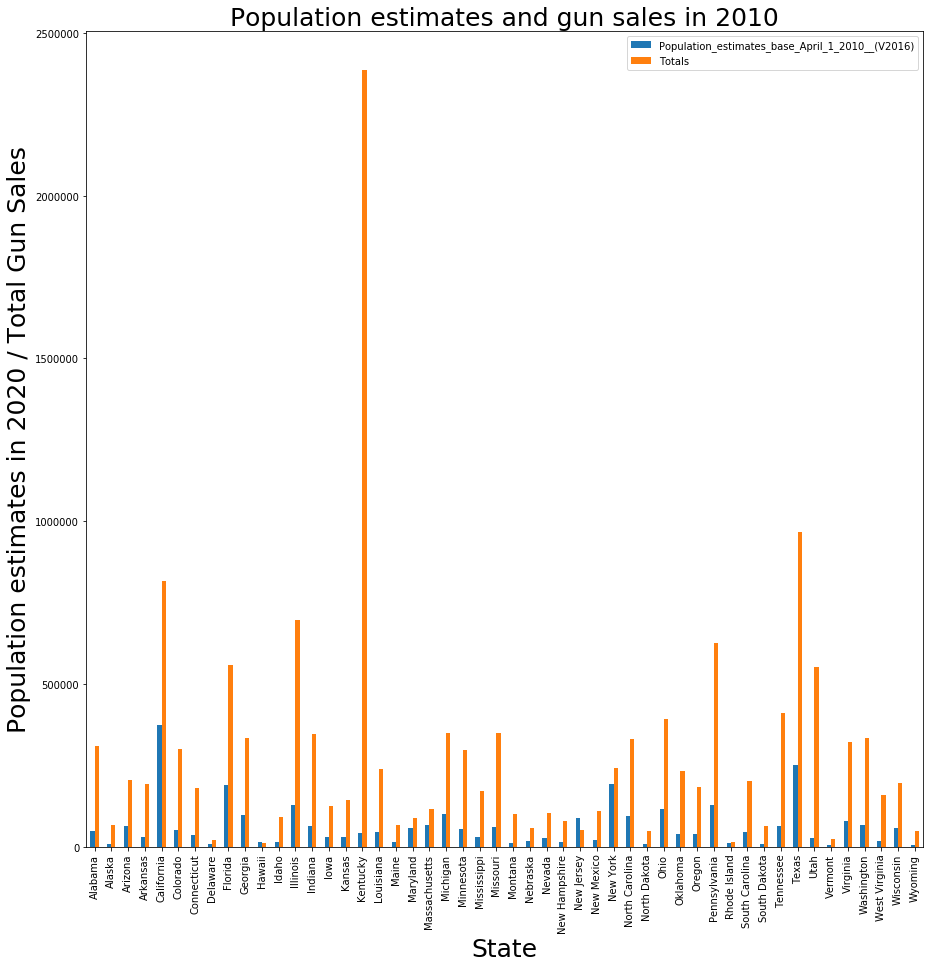

In [41]:
merged_pop_and_guns_2010.plot(x='State', y=['Population_estimates_base_April_1_2010__(V2016)', 'Totals'], kind='bar', figsize=(15,15))
plt.title('Population estimates and gun sales in 2010', fontsize=25)
plt.xlabel('State', fontsize=25)
plt.ylabel('Population estimates in 2020 / Total Gun Sales',fontsize=25);

This visualization shows that Kentucky, Texas, and California are the top three states with gun per capita in 2010

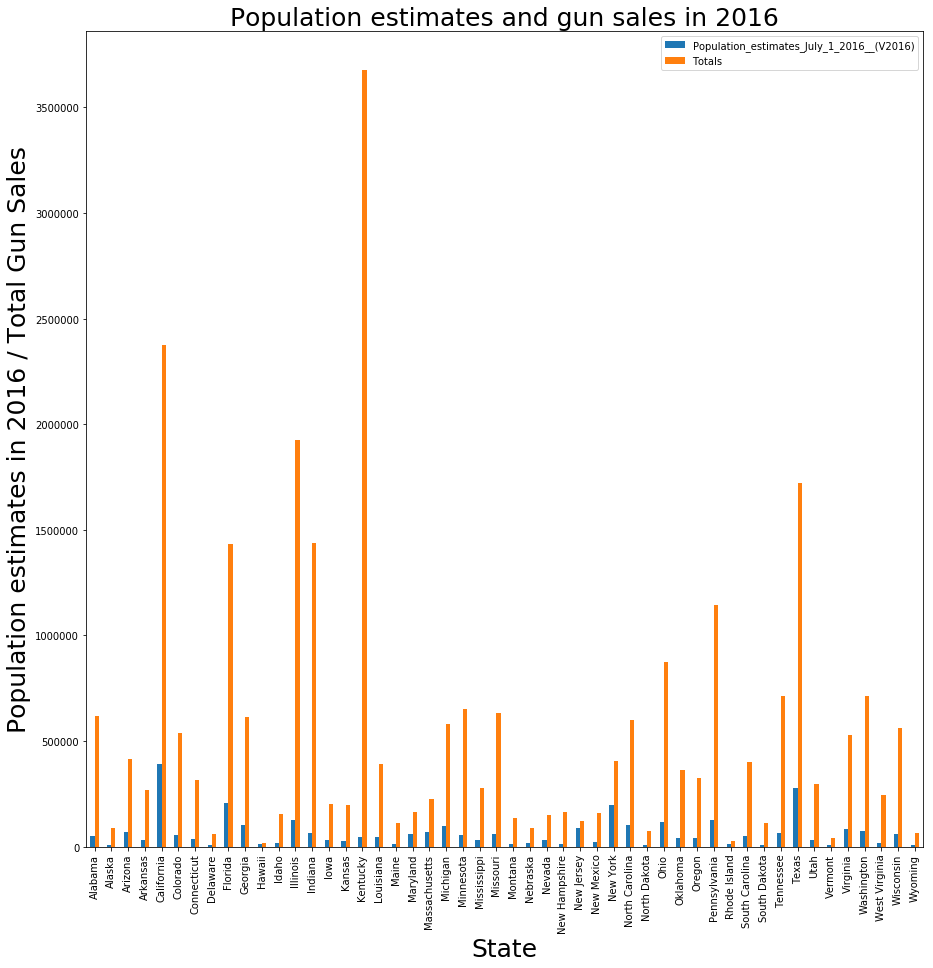

In [42]:
merged_pop_and_guns_2016.plot(x='State', y=['Population_estimates_July_1_2016__(V2016)', 'Totals'], kind='bar', figsize=(15,15))
plt.title('Population estimates and gun sales in 2016', fontsize=25)
plt.xlabel('State', fontsize=25)
plt.ylabel('Population estimates in 2016 / Total Gun Sales', fontsize=25);

This visualization shows that Kentucky, California, and Illinois are the top three states with gun per capita in 2016

### Research Question 2  (Which states have had the highest growth in gun registrations?)

In [43]:
# determine the highest states in total gun registrations
total_guns_for_each_state = gun_copy.groupby('State')['Totals'].sum()
sort_guns = total_guns_for_each_state.sort_values(ascending = False)
sort_guns

State
Kentucky                29762434
Texas                   19435186
California              19014063
Illinois                15471534
Pennsylvania            13133876
Florida                 11695777
Ohio                     8462744
North Carolina           7777689
Indiana                  7737172
Tennessee                7311293
Michigan                 7254279
Georgia                  7209942
Alabama                  6706079
Missouri                 6549018
Washington               6384517
Minnesota                6279271
Colorado                 6058482
Virginia                 5878675
Wisconsin                5131725
Louisiana                4705057
New York                 4643828
Oklahoma                 4584454
Arizona                  4425714
Utah                     4338273
South Carolina           4014432
Arkansas                 3752633
Oregon                   3751061
Mississippi              3576312
West Virginia            3208889
Connecticut              3168126
Kans

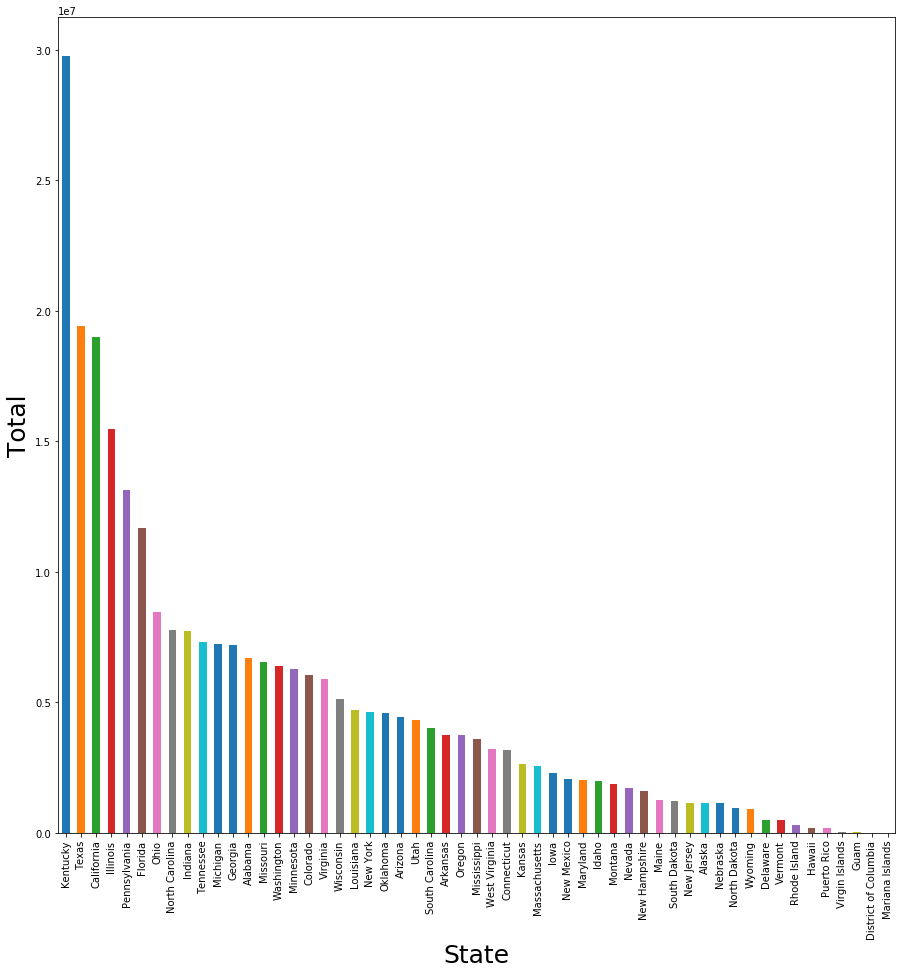

In [44]:
sort_guns.plot(x='State', kind = 'bar', figsize=(15, 15))
plt.xlabel('State', fontsize = 25)
plt.ylabel('Total', fontsize = 25);

This visualization shows that Kentucky experienced the highest growth in gun registerations from 1998 to 2017

It can also be seen that Kentucky, Texas, and California are the top three states in both the highest growth in gun registerations and gun per capita (2016) states

As shown Mariana Islands and District of Columbia have the lowest growth in registering guns

### Research Question 3 (What is the overall trend of gun purchases?)

In [45]:
# determine the total guns registered per annum from 1998 to 2017
total_guns_per_annum = gun_copy.groupby('Year')['Totals'].sum()
total_guns_per_annum

Year
1998      891898
1999     9043747
2000     8427096
2001     8820045
2002     8367069
2003     8402244
2004     8579891
2005     8867055
2006     9993057
2007    11162272
2008    12692985
2009    13984953
2010    14320489
2011    16336732
2012    19463832
2013    20966704
2014    20860241
2015    23026288
2016    27425512
2017    17990528
Name: Totals, dtype: int64

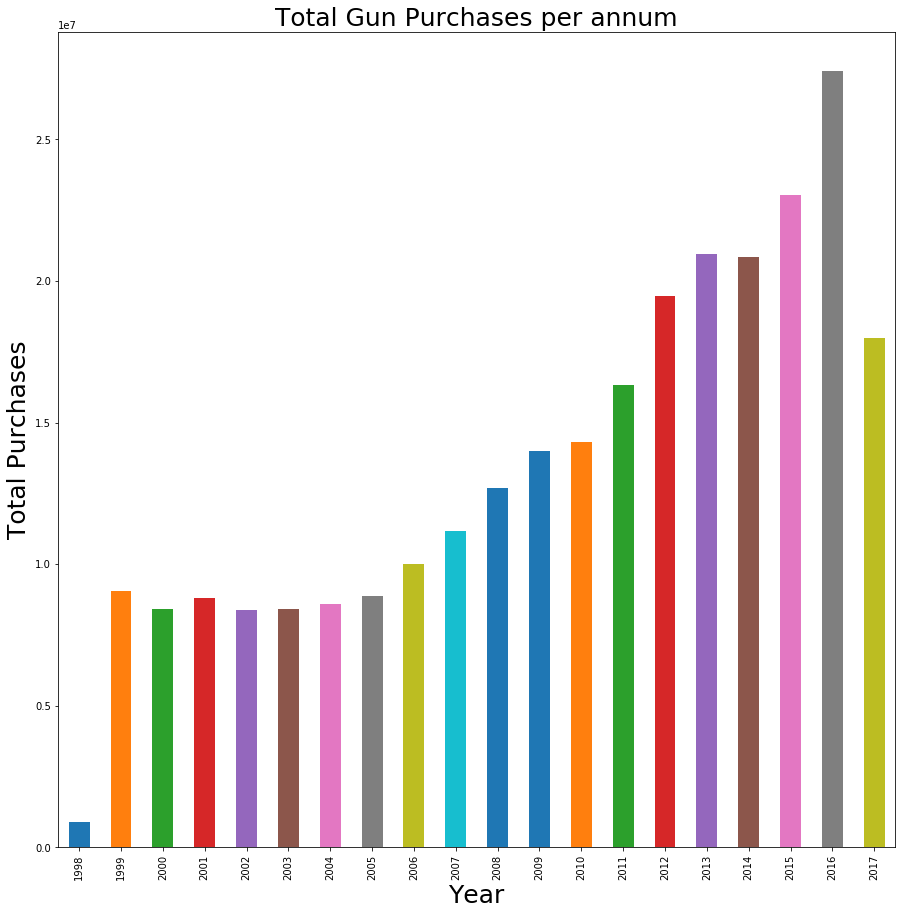

In [46]:
total_guns_per_annum.plot(x='Year', kind = 'bar', figsize=(15, 15))
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Total Purchases', fontsize = 25)
plt.title('Total Gun Purchases per annum', fontsize=25);

As shown 2016 is the highest year with 27425512 total gun purchases, and 1998 is the lowest one with 891898 total gun purchases

It can also be seen that there is a drop in total gun purchases in 2017

In [47]:
# remove 1998 and 2017 gun data due to missing of information of 10 months
edited_gun_copy = gun_copy.copy()
edited_gun_copy.drop(edited_gun_copy[edited_gun_copy['Year'] == 1998].index, inplace=True)
edited_gun_copy.drop(edited_gun_copy[edited_gun_copy['Year'] == 2017].index, inplace=True)

In [48]:
# determine the total guns registered per month from 1999 to 2016
total_guns_per_month = edited_gun_copy.groupby('Month')['Totals'].sum()
total_guns_per_month

Month
1     20562246
2     22162065
3     22935178
4     19285393
5     17019360
6     16679299
7     16991064
8     18970042
9     19765671
10    22460456
11    24458390
12    29451048
Name: Totals, dtype: int64

In [49]:
# determine the total guns registered over each month per annum from 1999 to 2016
total_guns_for_months_per_annum = gun_copy.groupby(['Month', 'Year'])['Totals'].sum()
total_guns_for_months_per_annum

Month  Year
1      1999     585974
       2000     628853
       2001     633916
       2002     655987
       2003     646882
       2004     685638
       2005     678733
       2006     767936
       2007     893575
       2008     941043
       2009    1212863
       2010    1112312
       2011    1312544
       2012    1368816
       2013    2483230
       2014    1650565
       2015    1763233
       2016    2540146
       2017    2032108
2      1999     690215
       2000     696313
       2001     666352
       2002     687011
       2003     703956
       2004     715879
       2005     735103
       2006     815478
       2007     913547
       2008    1019972
       2009    1257324
                ...   
11     2006    1043598
       2007    1079062
       2008    1528341
       2009    1217229
       2010    1286817
       2011    1527454
       2012    1997703
       2013    1805759
       2014    1797163
       2015    2236457
       2016    2554486
12     1998     870722

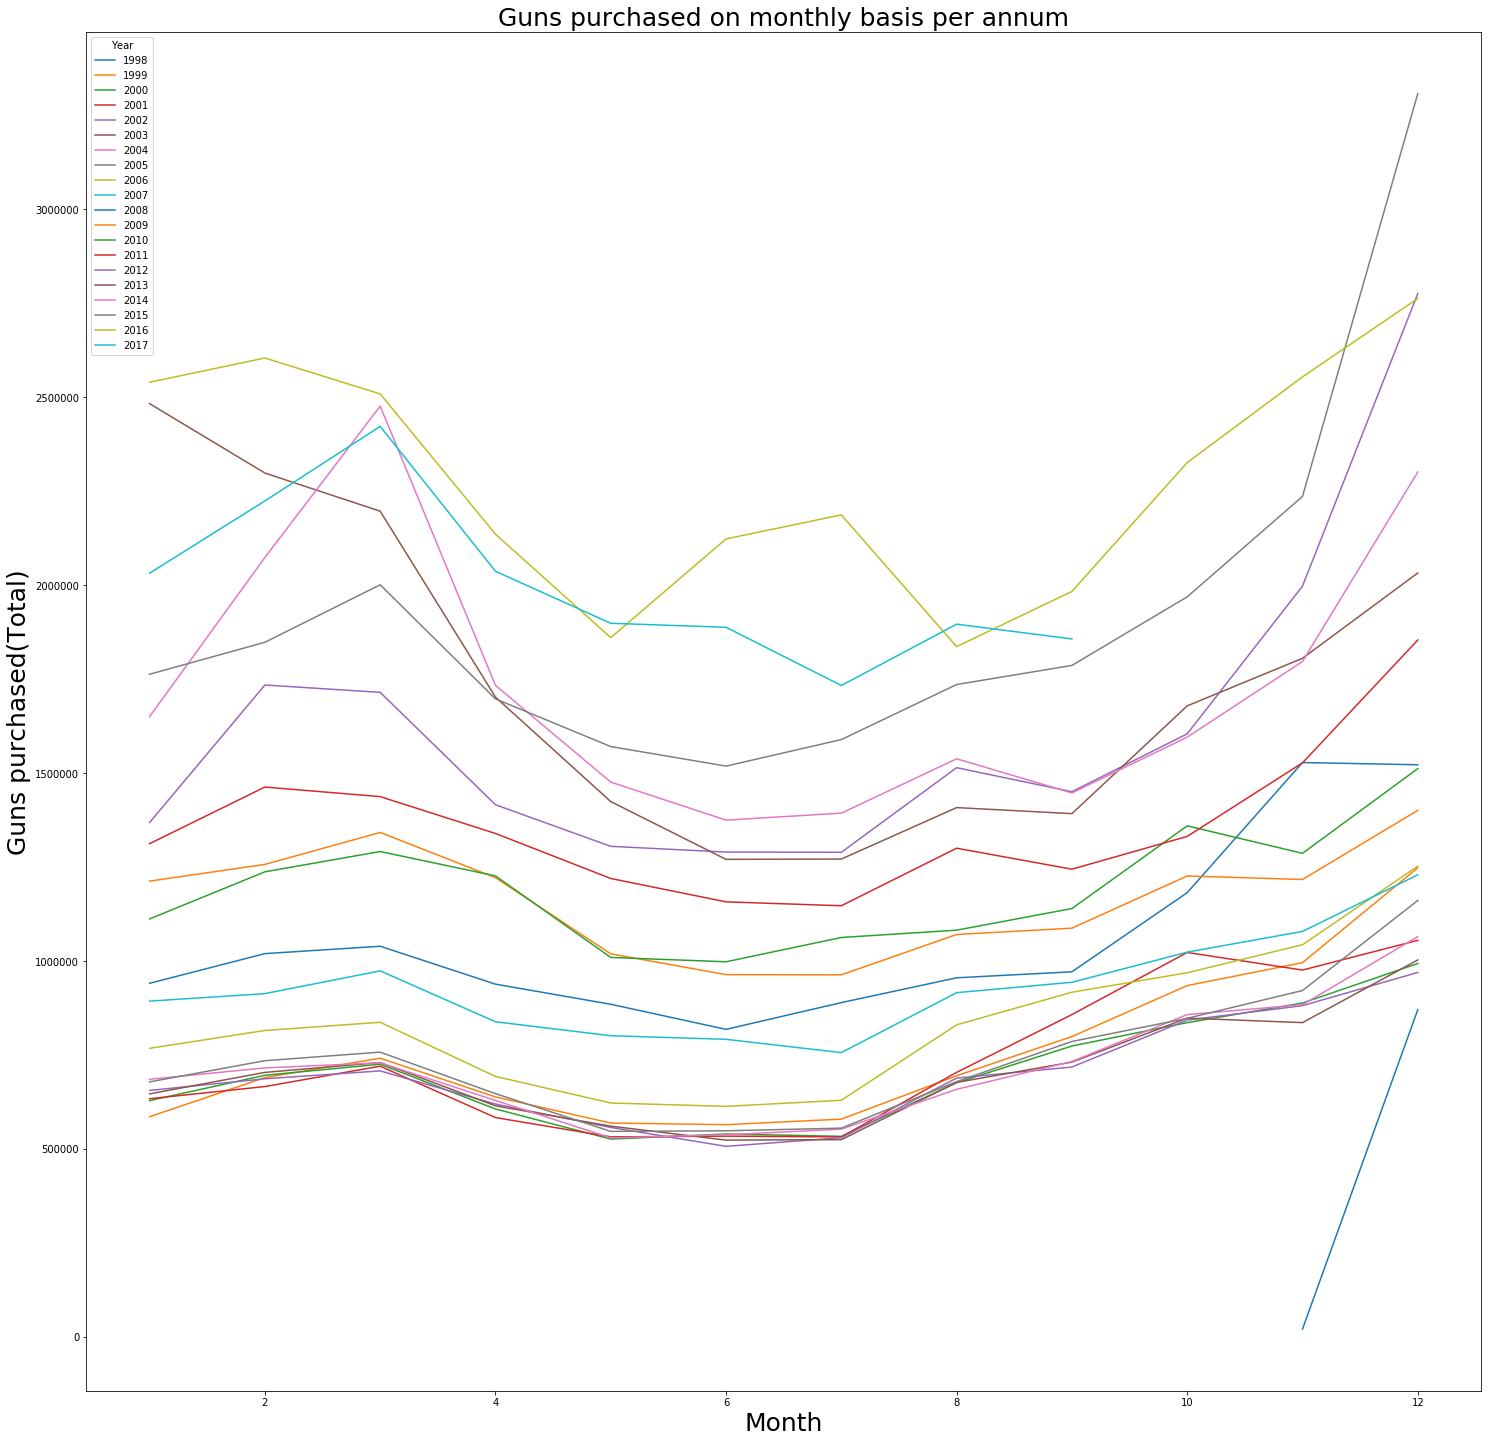

In [50]:
total_guns_for_months_per_annum.unstack().plot(figsize=(25,25)) 
plt.xlabel('Month', fontsize=25)
plt.ylabel('Guns purchased(Total)', fontsize=25)
plt.title('Guns purchased on monthly basis per annum', fontsize=25);

As shown gun purchases drop in June and rise in December

It can also be seen that December 2015 scored 3308199 (the highest) gun purchases

In [51]:
merged_pop_and_guns_2010.describe()

,Population_estimates_base_April_1_2010__(V2016),Totals
count,50.000000,5.000000e+01
mean,61631.267400,2.861985e+05
std,68484.630706,3.689456e+05
min,5637.670000,1.053300e+04
25%,18330.032500,8.912925e+04
50%,44364.115000,1.931225e+05
75%,66803.620000,3.348182e+05
max,372545.200000,2.385579e+06


In [52]:
merged_pop_and_guns_2016.describe()

,Population_estimates_July_1_2016__(V2016),Totals
count,50.000000,5.000000e+01
mean,64489.268400,5.481110e+05
std,72717.690186,6.826073e+05
min,5855.010000,1.668100e+04
25%,18501.055000,1.500798e+05
50%,45593.200000,3.212000e+05
75%,71987.677500,6.159565e+05
max,392500.160000,3.676847e+06


In [53]:
# describe statisitcs e.g. 
gun_copy.describe()

,Month,Permit,Permit_recheck,Handgun,Long_gun,Other,Multiple,Admin,Prepawn_handgun,Prepawn_long_gun,...,Rentals_handgun,Rentals_long_gun,Private_sale_handgun,Private_sale_long_gun,Private_sale_other,Return_to_seller_handgun,Return_to_seller_long_gun,Return_to_seller_other,Totals,Year
count,12220.000000,12215.000000,1097.000000,12219.000000,12220.000000,5447.000000,12220.000000,12215.000000,10360.000000,10357.000000,...,984.000000,822.000000,2740.000000,2740.000000,2740.000000,2466.000000,2740.000000,2248.000000,12220.000000,12220.000000
mean,6.479787,6542.794597,1169.144941,6060.486374,7968.087234,363.979071,274.428232,60.089071,4.912838,7.972579,...,0.077236,0.087591,14.990511,11.645255,1.033942,0.403487,0.443431,0.106317,22064.045663,2007.861948
std,3.451083,23972.720376,9236.614361,8663.177020,9336.229927,1355.557984,790.621841,610.841121,10.984207,16.579642,...,0.636408,0.672854,71.340177,54.347499,4.475557,1.449002,1.530776,0.427987,32785.716264,5.468359
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
25%,3.000000,0.000000,0.000000,986.000000,2240.750000,18.500000,19.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5059.750000,2003.000000
50%,6.000000,575.000000,0.000000,3191.000000,5279.000000,123.000000,132.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12800.000000,2008.000000
75%,9.000000,4453.500000,0.000000,7434.500000,10506.250000,358.000000,307.000000,0.000000,5.000000,8.000000,...,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25893.250000,2013.000000
max,12.000000,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,...,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000,2017.000000


<a id='conclusions'></a>
## Conclusions

1. The highest gun purchases happened in 2016
2. Lowest month in guns purchases is June; Highest month in guns purchases is December 

Rank of the highest states with guns sales:

1. Kentucky

2. Texas

3. California

4. Illinos

5. Pennsylvania

6. Florida

7. Ohio

8. North Calorina

9. Indiana

10. Tennesse

### Limitations
1. Information missed for 10 months in 1998 and 2017
2. Data avaliable for census is ONLY for population in 2010 and 2016

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0